<a href="https://colab.research.google.com/github/ToluPaul/forex/blob/main/forex_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
vix = pd.read_csv('/content/vix.csv')

In [3]:
vix.head()

,Pair,Action,Outcome,cost,Date,EntryPrice,Sl,Tp,Time,Exittime,RRR
0,vix10,Buy,sl,-6.38,04/11/2023,7103.4040,7090.8190,7136.2280,0:19:21,4:10:46,2.608184346
1,vix25,Buy,tp,11.56,04/11/2023,2228.8090,2218.8910,2251.8760,20:26:02,22:23:30,2.325771325
2,vix100,Sell,tp,26.46,05/11/2023,1802.8000,1820.6500,1749.9100,4:41:05,8:19:21,2.96302521
3,vix10,Sell,sl,-3.26,05/11/2023,7084.9190,7091.3930,7062.7680,4:41:26,6:54:22,3.421532283
4,vix50,Buy,sl,-6.03,05/11/2023,191.5289,190.0258,195.7944,13:55:44,16:35:04,2.837801876


In [4]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pair        52 non-null     object 
 1   Action      52 non-null     object 
 2   Outcome     52 non-null     object 
 3   cost        52 non-null     float64
 4   Date        52 non-null     object 
 5   EntryPrice  52 non-null     float64
 6   Sl          52 non-null     float64
 7   Tp          52 non-null     float64
 8   Time        52 non-null     object 
 9   Exittime    52 non-null     object 
 10  RRR         53 non-null     object 
dtypes: float64(4), object(7)
memory usage: 4.7+ KB


In [5]:
vix['Date'] = pd.to_datetime(vix['Date'], dayfirst=True)
vix['Time'] = pd.to_datetime(vix['Time'],format='%H:%M:%S')
vix['Exittime'] = pd.to_datetime(vix['Exittime'],format='%H:%M:%S')

In [6]:
vix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Pair        52 non-null     object        
 1   Action      52 non-null     object        
 2   Outcome     52 non-null     object        
 3   cost        52 non-null     float64       
 4   Date        52 non-null     datetime64[ns]
 5   EntryPrice  52 non-null     float64       
 6   Sl          52 non-null     float64       
 7   Tp          52 non-null     float64       
 8   Time        52 non-null     datetime64[ns]
 9   Exittime    52 non-null     datetime64[ns]
 10  RRR         53 non-null     object        
dtypes: datetime64[ns](3), float64(4), object(4)
memory usage: 4.7+ KB


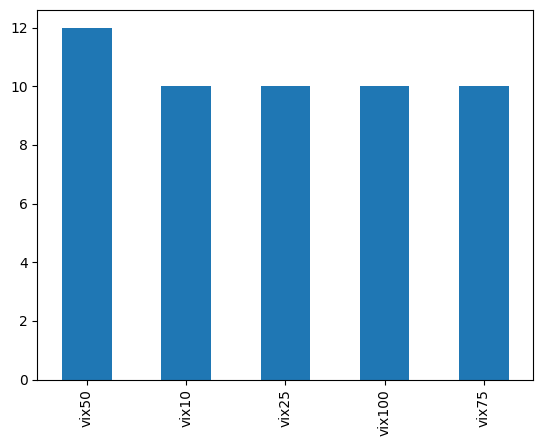

In [7]:
vix['Pair'].value_counts().plot(kind = 'bar')
plt.show()

In [8]:
vix['Pair'].nunique()

5

In [9]:
vix_cost_sorted = vix[['Pair', 'cost' ]].groupby(['Pair']).agg(sum).sort_values('cost').reset_index()
print(vix_cost_sorted)

     Pair    cost
0   vix10  -27.55
1   vix50   -8.17
2   vix75   23.80
3   vix25   24.28
4  vix100  136.99


In [10]:
print('The best performing pair is ')#.format(vix_cost_sorted[['cost']].head(1)))
print(vix_cost_sorted[-1:])
print('')#.format(vix_cost_sorted[['cost']].head(1)))
print('The worst performing pair is ')#.format(vix_cost_sorted[['cost']].head(1)))
print(vix_cost_sorted[:1])

The best performing pair is 
     Pair    cost
4  vix100  136.99

The worst performing pair is 
    Pair   cost
0  vix10 -27.55


In [11]:
#average profit per pair
vix[['Pair', 'cost' ]].groupby(['Pair']).agg('mean').sort_values('cost', ascending=False).reset_index()

,Pair,cost
0,vix100,13.699000
1,vix25,2.428000
2,vix75,2.380000
3,vix50,-0.680833
4,vix10,-2.755000


In [12]:
vix['cumsum'] = vix['cost'].cumsum()
vix.head()

,Pair,Action,Outcome,cost,Date,EntryPrice,Sl,Tp,Time,Exittime,RRR,cumsum
0,vix10,Buy,sl,-6.38,2023-11-04,7103.4040,7090.8190,7136.2280,1900-01-01 00:19:21,1900-01-01 04:10:46,2.608184346,-6.38
1,vix25,Buy,tp,11.56,2023-11-04,2228.8090,2218.8910,2251.8760,1900-01-01 20:26:02,1900-01-01 22:23:30,2.325771325,5.18
2,vix100,Sell,tp,26.46,2023-11-05,1802.8000,1820.6500,1749.9100,1900-01-01 04:41:05,1900-01-01 08:19:21,2.96302521,31.64
3,vix10,Sell,sl,-3.26,2023-11-05,7084.9190,7091.3930,7062.7680,1900-01-01 04:41:26,1900-01-01 06:54:22,3.421532283,28.38
4,vix50,Buy,sl,-6.03,2023-11-05,191.5289,190.0258,195.7944,1900-01-01 13:55:44,1900-01-01 16:35:04,2.837801876,22.35


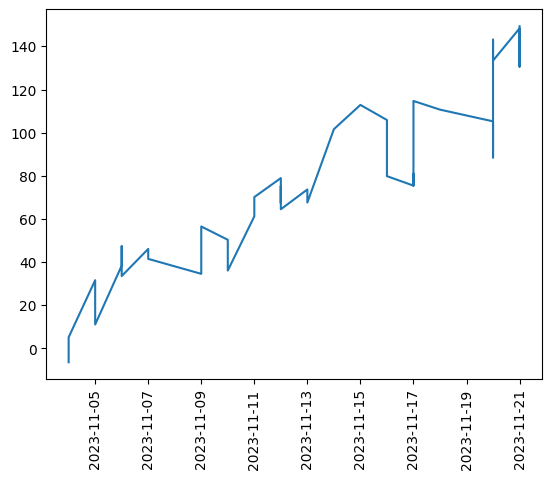

In [17]:
plt.plot(vix['Date'],vix['cumsum'])
plt.xticks(rotation= 'vertical')
plt.show()

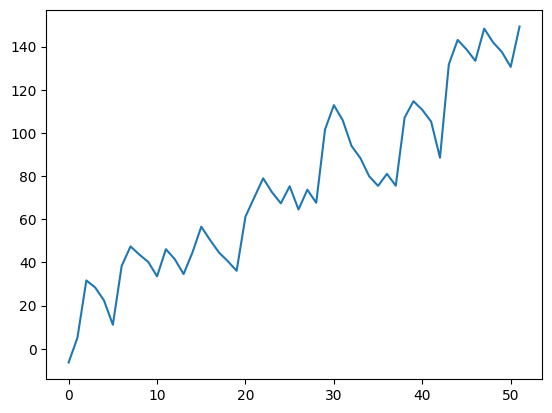

In [18]:
plt.plot(vix['cumsum'])
plt.show()

In [21]:
vix['cumsum'].max()

149.34999999999997